In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import os
os.getcwd()

'/mnt/c/Users/feder/Documents/GitHub/ia-uncuyo-2023/tp5-busquedas-locales'

In [27]:
df = pd.read_pickle('code/results1.pkl')
df['seconds'] = df['nanos']
df = df.drop(columns=['nanos'])
df['agent_params'] = df['agent_params'].map(lambda h_map: " ".join([f"{k}:{v:.3f}" for k, v in h_map.items()]))
df['solved'] = df['score'] == 0
df['solved'] = df['solved'].astype(int)

In [28]:
df

,agent,agent_params,size,score,visited,run,seconds,solved
0,hill_climbing,,4,1,30,0,3,0
1,hill_climbing,,4,2,15,1,3,0
2,hill_climbing,,4,3,30,2,3,0
3,hill_climbing,,4,1,30,3,3,0
4,hill_climbing,,4,1,30,4,3,0
...,...,...,...,...,...,...,...,...
5395,genetic_algorithm,p_size:1000.000 gen:100.000 mut:0.500,128,15,100000,95,109,0
5396,genetic_algorithm,p_size:1000.000 gen:100.000 mut:0.500,128,13,100000,96,50,0
5397,genetic_algorithm,p_size:1000.000 gen:100.000 mut:0.500,128,17,100000,97,48,0
5398,genetic_algorithm,p_size:1000.000 gen:100.000 mut:0.500,128,19,100000,98,54,0


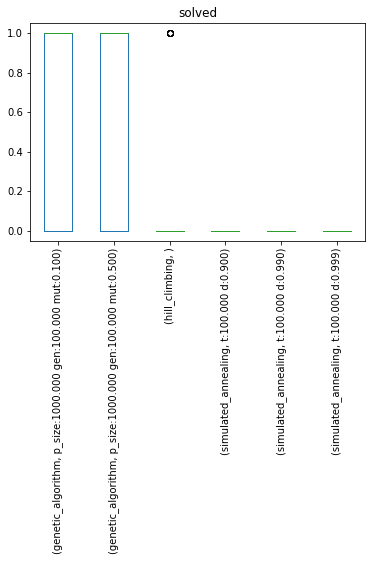

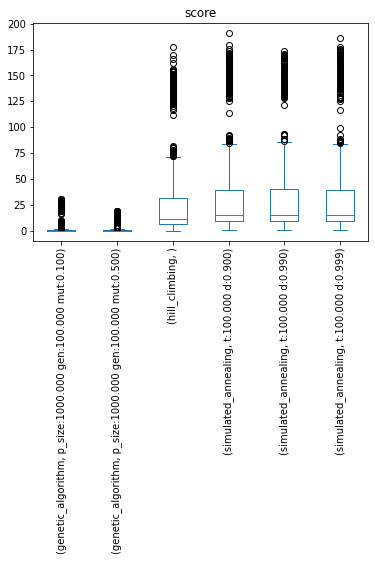

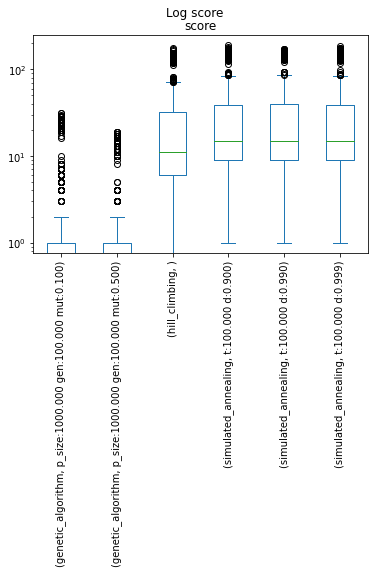

In [26]:
df.plot(kind="box", by=['agent', 'agent_params'], column=['solved'], title="Solved (Higher is better)")
plt.xticks(rotation=90)
df.plot(kind="box", by=['agent', 'agent_params'], column=['score'], title="Score (Lower is better)")
plt.xticks(rotation=90)
df.plot(kind="box", by=['agent', 'agent_params'], column=['score'], logy=True, title="Log score (Lower is better)")
plt.xticks(rotation=90)
None

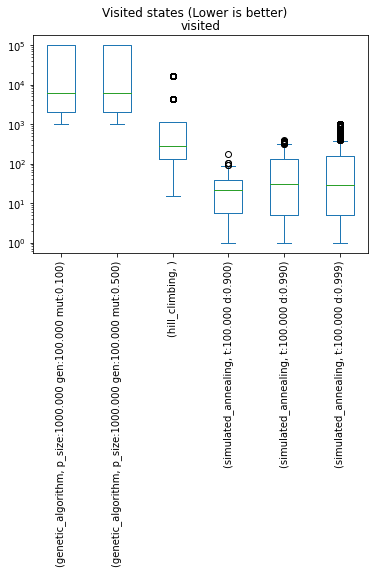

In [31]:
df.plot(kind="box", by=['agent', 'agent_params'], column=['visited'], logy=True, title="Visited states (Lower is better)")
plt.xticks(rotation=90)
None

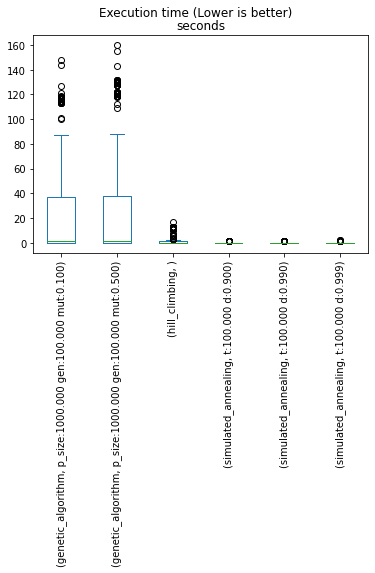

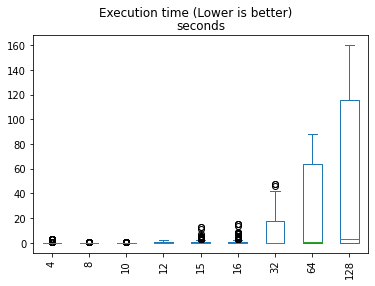

In [35]:
df.plot(kind="box", by=['agent', 'agent_params'], column=['seconds'], logy=False, title="Execution time (Lower is better)")
plt.xticks(rotation=90)
df.plot(kind="box", by=['size'], column=['seconds'], logy=False, title="Execution time (Lower is better)")
plt.xticks(rotation=90)
None

In [39]:
df2 = pd.read_pickle('code/results2.pkl')
df2

,agent,agent_params,size,score,visited,nanos,result,run
0,hill_climbing,{},4,1,30,1,"[2, 0, 3, 0]",0
1,simulated_annealing,"{'t': 100, 'd': 0.999}",4,4,22,1,"[1, 3, 2, 1]",0
2,simulated_annealing,"{'t': 100, 'd': 0.99}",4,4,1,0,"[0, 3, 2, 1]",0
3,simulated_annealing,"{'t': 100, 'd': 0.9}",4,5,32,1,"[2, 2, 1, 2]",0
4,genetic_algorithm,"{'p_size': 1000, 'gen': 100, 'mut': 0.1}",4,0,1000,1,"[2, 0, 3, 1]",0
5,genetic_algorithm,"{'p_size': 1000, 'gen': 100, 'mut': 0.5}",4,0,1000,1,"[1, 3, 0, 2]",0
6,hill_climbing,{},8,8,90,1,"[0, 2, 3, 0, 0, 4, 0, 5]",0
7,simulated_annealing,"{'t': 100, 'd': 0.999}",8,10,20,0,"[3, 4, 3, 5, 5, 1, 5, 3]",0
8,simulated_annealing,"{'t': 100, 'd': 0.99}",8,10,39,1,"[6, 7, 6, 4, 2, 6, 3, 4]",0
9,simulated_annealing,"{'t': 100, 'd': 0.9}",8,7,5,1,"[2, 5, 6, 2, 0, 5, 5, 0]",0
